In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [3]:
iv3= InceptionV3()

In [4]:
print(iv3.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
from keras.preprocessing import image

In [6]:
x=image.load_img("./Fotos/A.jpg",target_size=(299,299)) #Fichero de tipo imagen de 299x299 pixeles RGB
x=image.img_to_array(x) # Lo convertimos en matriz.
print(x)

[[[ 20.  21.  15.]
  [ 27.  30.  19.]
  [ 39.  46.  28.]
  ...
  [ 55.  56.  40.]
  [ 61.  61.  49.]
  [ 68.  68.  58.]]

 [[ 19.  20.  14.]
  [ 26.  29.  18.]
  [ 40.  47.  29.]
  ...
  [ 49.  50.  34.]
  [ 55.  55.  43.]
  [ 62.  62.  52.]]

 [[ 19.  20.  14.]
  [ 26.  29.  18.]
  [ 38.  45.  27.]
  ...
  [ 45.  46.  30.]
  [ 53.  53.  41.]
  [ 61.  61.  51.]]

 ...

 [[ 47.  67.  14.]
  [ 91. 111.  62.]
  [ 69.  91.  29.]
  ...
  [ 53.  70.  26.]
  [ 75.  94.  39.]
  [ 95. 114.  58.]]

 [[ 57.  78.  22.]
  [ 57.  77.  24.]
  [ 71.  93.  29.]
  ...
  [ 54.  66.  18.]
  [ 90. 104.  42.]
  [112. 128.  55.]]

 [[ 72.  93.  37.]
  [ 46.  67.  10.]
  [ 80. 104.  30.]
  ...
  [116. 122.  74.]
  [129. 138.  71.]
  [113. 125.  43.]]]


In [7]:
print(x.shape) #Dimenciones de la imagen RGB

(299, 299, 3)


#### El algoritmo Inception_V3 tiene un algoritmo que trabaja con valores de intensidad de imagen de -1 a 1 y no de 0 a 255, por lo que debemos de cambiar eso en los datos de entrada.

In [8]:
# Reescalamos el rango de intensidad de la matriz.
x /= 255
x -= 0.5
x *= 2
#Graficamos
print(x)

[[[-0.84313726 -0.8352941  -0.88235295]
  [-0.7882353  -0.7647059  -0.8509804 ]
  [-0.69411767 -0.6392157  -0.78039217]
  ...
  [-0.5686275  -0.56078434 -0.6862745 ]
  [-0.52156866 -0.52156866 -0.6156863 ]
  [-0.46666664 -0.46666664 -0.54509807]]

 [[-0.8509804  -0.84313726 -0.8901961 ]
  [-0.79607844 -0.77254903 -0.85882354]
  [-0.6862745  -0.6313726  -0.77254903]
  ...
  [-0.6156863  -0.60784316 -0.73333335]
  [-0.5686275  -0.5686275  -0.6627451 ]
  [-0.5137255  -0.5137255  -0.5921569 ]]

 [[-0.8509804  -0.84313726 -0.8901961 ]
  [-0.79607844 -0.77254903 -0.85882354]
  [-0.7019608  -0.64705884 -0.7882353 ]
  ...
  [-0.64705884 -0.6392157  -0.7647059 ]
  [-0.58431375 -0.58431375 -0.6784314 ]
  [-0.52156866 -0.52156866 -0.6       ]]

 ...

 [[-0.6313726  -0.47450978 -0.8901961 ]
  [-0.2862745  -0.12941176 -0.5137255 ]
  [-0.4588235  -0.2862745  -0.77254903]
  ...
  [-0.58431375 -0.45098037 -0.79607844]
  [-0.41176468 -0.26274508 -0.69411767]
  [-0.25490195 -0.10588235 -0.54509807]]

 [

#### La red neuronal pide que ingresemos un tensor de 4 dimensiones: (Tamanio del lote (bach size) (cantidad de imagenes), alto, ancho, profundidad de pixel).

Tensor: Matriz multidimencional.

In [9]:
# Redimencionamos el vector.
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

In [10]:
# Cargamos la imagen en el modelo a ver que nos devuelve.
y=iv3.predict(x)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [11]:
y.shape # Nos devuelve un vector de objetos con sus probabilidades de acertar a lo que tiene la foto.

(1, 1000)

#### En este momento si hacemos print(y) obtendremos un vector de numeros que no nos dira nada, es por eso que ahora hacemos uso de una parde de Keras que cargamos con anterioridad (decode_predictions from keras.aplications.inception_V3) que va a darle nombre a cada valor y de esa manera entender que decodifico.

In [12]:
decode_predictions(y)

[[('n02480855', 'gorilla', 0.95214295),
  ('n02481823', 'chimpanzee', 0.0036015252),
  ('n02486410', 'baboon', 0.00054383226),
  ('n02487347', 'macaque', 0.00043091355),
  ('n02483708', 'siamang', 0.00036995244)]]

#### Y efectivamente nos marca que lo que hay en la imagen es un gorila con una probabilidad de 95.214295%.

## Ahora probamos con la otra imagen

In [13]:
x=image.load_img("./Fotos/B.jpg",target_size=(299,299)) #Fichero de tipo imagen de 299x299 pixeles RGB
x=image.img_to_array(x) # Lo convertimos en matriz.
# Reescalamos el rango de intensidad de la matriz.
x /= 255
x -= 0.5
x *= 2
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])
y=iv3.predict(x)
decode_predictions(y)

[[('n04467665', 'trailer_truck', 0.9031031),
  ('n03796401', 'moving_van', 0.013126326),
  ('n04461696', 'tow_truck', 0.0011830446),
  ('n03776460', 'mobile_home', 0.0006672245),
  ('n01985128', 'crayfish', 0.0006549401)]]

Y efectivamente reconoce el camion, probe con flores pero no las reconoce.

# Ahora que ya sabemos que funciona la red neuronal vamos a tratar de romperla. (Ataques adversario)

#### Vamos a generar un tipo de dato que se suministra como entrada a la red neuronal y genera error en la red neuronal pese a que la imagen es clara para una persona pero la computadora no puede reconocerla.

Para hacer esto vamos a tomar la primera capa de entrada y la ultima de salida. y vamos a construir un nuevo grafo que va a tomar nuestra imagen y la va a modificar levemente para que la red neuronal de otra cosa como respuesta.

In [14]:
inp_layer = iv3.layers[0].input  # Primera capa de la entrada
out_layer = iv3.layers[-1].output # Ultima capa de la salida

print(inp_layer)
print(out_layer)

Tensor("input_1:0", shape=(None, 299, 299, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(None, 1000), dtype=float32)


#### Vamos a tratar de que el gorila se convierta en un limon para la red neuronal. Limon = 951

In [15]:
x=image.load_img("./Fotos/A.jpg",target_size=(299,299)) #Fichero de tipo imagen de 299x299 pixeles RGB
x=image.img_to_array(x) # Lo convertimos en matriz.
# Reescalamos el rango de intensidad de la matriz.
x /= 255
x -= 0.5
x *= 2
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

In [27]:
#Hacemos una variable objetivo con el valor del limon.
target_class = 951 
#  pedimos las caracteristicas que valua la red para detectar al limon (revisar print(out_layer))
loss = out_layer[0,target_class] # Funcion de coste. (Maximisar la clase 951)

### Ahora debemos de crear nuestro gradiente entre el error y los parametros del limon.

K.gradients(loss, inp_layer)[0] va a devolver un tensor que nos va a decir en que proporcion debemos de variar los pixeles de la imagen para que nos identifique un limon en vez de un gorila.

In [33]:
# Calculamos el gradiente necesario para calcular un limon
grad = K.gradients(loss, inp_layer)[0]
# Optimize_gradient es una funcion que entrenamos para que modifique los datos de entrada segun el gradiente que quiere a la salida
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])
adversario =np.copy(x) #Esta va a ser la entrada

#definimos el maximo de perturvaciones que se pueden hacer
perturvacion = 0.01
max_pert = x + perturvacion
min_pert = x - perturvacion

cost = 0.0 # Es que tanto se acerca la red a detectar un limon
while cost < 0.0005: #Deberia ponerse a 95% pero tarda mucho.
    gr, cost = optimize_gradient([adversario,0])
    # Se calcula el nuevo gradiente y se suma a la imagen adversaria.
    adversario += gr 
    
    # Limitamos los valores maximos y minimos del array
    adversario = np.clip(adversario, min_pert, max_pert)
    adversario = np.clip(adversario, -1, 1)
    
    print("Target cost: " , cost)

Target cost:  3.1113614e-05
Target cost:  3.1180338e-05
Target cost:  3.1247557e-05
Target cost:  3.1314357e-05
Target cost:  3.138133e-05
Target cost:  3.1449392e-05
Target cost:  3.1517622e-05
Target cost:  3.15868e-05
Target cost:  3.1655763e-05
Target cost:  3.1724718e-05
Target cost:  3.179372e-05
Target cost:  3.1863245e-05
Target cost:  3.1932064e-05
Target cost:  3.200208e-05
Target cost:  3.207068e-05
Target cost:  3.213919e-05
Target cost:  3.2207965e-05
Target cost:  3.227673e-05
Target cost:  3.234544e-05
Target cost:  3.2413893e-05
Target cost:  3.248271e-05
Target cost:  3.255156e-05
Target cost:  3.262011e-05
Target cost:  3.2689037e-05
Target cost:  3.275814e-05
Target cost:  3.2827644e-05
Target cost:  3.2896998e-05
Target cost:  3.2967313e-05
Target cost:  3.3037337e-05
Target cost:  3.310726e-05
Target cost:  3.317857e-05
Target cost:  3.3250006e-05
Target cost:  3.332197e-05
Target cost:  3.3394354e-05
Target cost:  3.3467742e-05
Target cost:  3.3541466e-05
Target c

Target cost:  7.989809e-05
Target cost:  8.028368e-05
Target cost:  8.0668055e-05
Target cost:  8.104834e-05
Target cost:  8.143209e-05
Target cost:  8.181959e-05
Target cost:  8.2210994e-05
Target cost:  8.260992e-05
Target cost:  8.301635e-05
Target cost:  8.342631e-05
Target cost:  8.383612e-05
Target cost:  8.424631e-05
Target cost:  8.4657186e-05
Target cost:  8.507149e-05
Target cost:  8.5489395e-05
Target cost:  8.591305e-05
Target cost:  8.634166e-05
Target cost:  8.677853e-05
Target cost:  8.7215274e-05
Target cost:  8.765544e-05
Target cost:  8.809553e-05
Target cost:  8.853583e-05
Target cost:  8.897683e-05
Target cost:  8.9423884e-05
Target cost:  8.9865534e-05
Target cost:  9.030097e-05
Target cost:  9.0731155e-05
Target cost:  9.116438e-05
Target cost:  9.160397e-05
Target cost:  9.204901e-05
Target cost:  9.250338e-05
Target cost:  9.296311e-05
Target cost:  9.342492e-05
Target cost:  9.388524e-05
Target cost:  9.434815e-05
Target cost:  9.4814866e-05
Target cost:  9.528

#### Si queremos saber que hace una funcion por ejemplo np.clip, en un renglon colocamos "np.clip?" sin comillas

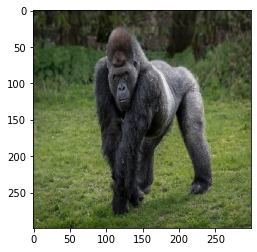

In [34]:
# Devolvemos las caracteristicas de una imagen tipo jpg
adversario /= 2
adversario += 0.5
adversario *= 255
plt.imshow(adversario[0].astype(np.uint8))
plt.show()

In [35]:
from PIL import Image
im=Image.fromarray(adversario[0].astype(np.uint8))
im.save("./Fotos/Limon.png")